In [1]:
# ===============================
# 1. Import Libraries
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# ===============================
# 2. Load Dataset
# ===============================
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")


In [4]:
print("Dataset Shape:", X.shape)
print("\nTarget Distribution:\n", y.value_counts())


Dataset Shape: (569, 30)

Target Distribution:
 target
1    357
0    212
Name: count, dtype: int64


C:\Users\Amita\AppData\Local\Temp\ipykernel_2540\2501549724.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


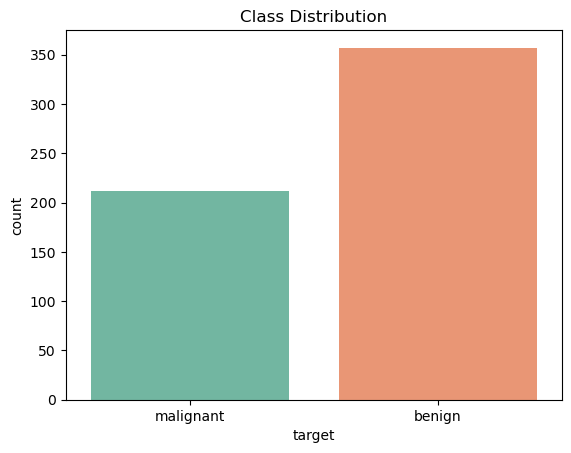

In [5]:
# ===============================
# 3. EDA (Exploratory Data Analysis)
# ===============================
# Class distribution
sns.countplot(x=y, palette="Set2")
plt.title("Class Distribution")
plt.xticks([0, 1], data.target_names)
plt.show()

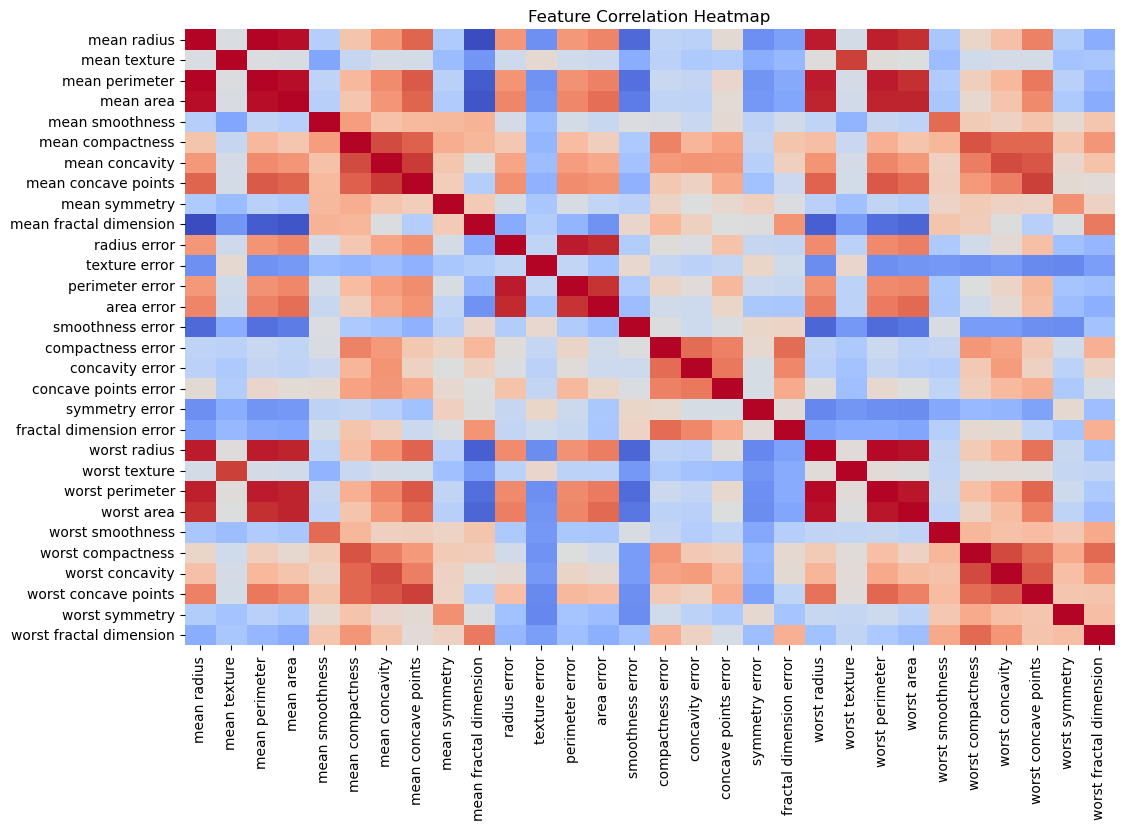

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", cbar=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
# Summary statistics
print("\nSummary Statistics:")
print(X.describe())


Summary Statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             

In [8]:
# ===============================
# 4. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
# ===============================
# 5. Feature Scaling
# ===============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# ===============================
# 6. SVM with Linear Kernel
# ===============================
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)



--- Linear Kernel ---
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



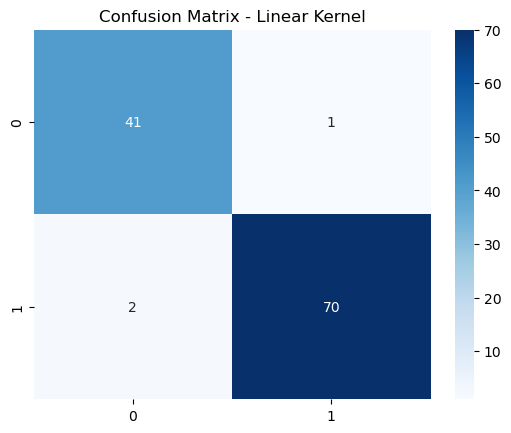

In [11]:
print("\n--- Linear Kernel ---")
print(classification_report(y_test, y_pred_linear))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Linear Kernel")
plt.show()


In [ ]:
# ===============================
# 7. SVM with RBF Kernel
# ===============================
svm_rbf = SVC(kernel="rbf", C=1, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

In [ ]:
print("\n--- RBF Kernel ---")
print(classification_report(y_test, y_pred_rbf))
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - RBF Kernel")
plt.show()


In [ ]:
# ===============================
# 8. Hyperparameter Tuning
# ===============================
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [1, 0.1, 0.01, 0.001],
    "kernel": ["rbf"]
}

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train_scaled, y_train)


In [ ]:
print("\nBest Parameters Found:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)


In [ ]:
print("\n--- Best Model Performance ---")
print(classification_report(y_test, y_pred_best))


In [ ]:
# ===============================
# 9. Cross-Validation
# ===============================
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


In [ ]:
# ===============================
# 10. PCA for 2D Visualization
# ===============================
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
# Train best model on PCA-transformed data
model_2d = SVC(kernel="rbf", C=grid.best_params_["C"], gamma=grid.best_params_["gamma"])
model_2d.fit(X_train_pca, y_train)


In [ ]:
# Create meshgrid for decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))


In [ ]:
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


In [ ]:
# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="coolwarm", edgecolor="k")
plt.title("SVM Decision Boundary (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()